In [1]:
import pandas
import pathlib
import re
# from tensorflow.keras.models import Sequential, load_module
# from tensorflow.keras.layers import Conv1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
import random
import numpy as np
import pandas as pd
# import plotly.graph_objects as go
from matplotlib import pyplot as plt
# import keras
# https://stackoverflow.com/questions/53066762/understanding-1d-convolution-of-dna-sequences-encoded-as-a-one-hot-vector
# https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset
# https://stackoverflow.com/questions/53066762/understanding-1d-convolution-of-dna-sequences-encoded-as-a-one-hot-vector

cwd = pathlib.Path.cwd()



1) Get historical output data
https://stackoverflow.com/questions/63483337/how-can-i-plot-training-accuracy-training-loss-with-respect-to-epochs-in-tensor

Plot those for various models and hyperparameters

2) Use categorical data with one hot encoding 
https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c

Spare does it as 0, 1, 2, 3, where as One hot does it as [0, 0, 1], [0, 1, 0], [1, 0, 0]. The returns for Spare are [p] which is
the most likley, but tends to be the last accurate. One hot returns as [p1, p2, p3] which shows the most probable.

https://crosstalk.cell.com/blog/youre-probably-confusing-likely-and-probably

In [2]:
# n_class = 3
# n_features = 100
# n_sample = 1000

# X = np.random.randint(0,10, (n_sample,n_features))
# y = pd.get_dummies(np.random.randint(0,n_class, n_sample)).values

# print(X)
# print(X.shape)
# # print(type(X))
# print(X[0])

# print(y)
# print(y.shape)
# print(type(y))

# inp = tf.keras.Input((n_features,))
# x = tf.keras.layers.Dense(128, activation='relu')(inp)
# out = tf.keras.layers.Dense(n_class, activation='softmax')(x)

# # model = tf.keras.Model(inp, out)
# # model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# # history = model.fit(X, y, epochs=3)

In [3]:
# n_class = 3
# n_features = 100
# n_sample = 1000

# X = np.random.randint(0,10, (n_sample,n_features))
# y = np.random.randint(0,n_class, n_sample)

# inp = tf.keras.Input((n_features,))
# x = tf.keras.layers.Dense(128, activation='relu')(inp)
# out = tf.keras.layers.Dense(n_class, activation='softmax')(x)

# print(X)
# print(X.shape)
# print(type(X))

# print(y)
# print(y.shape)
# print(type(y))

# # model = tf.keras.Model(inp, out)
# # model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# # history = model.fit(X, y, epochs=3)

In [4]:
# batch_size = 100
# epochs = 50
# steps_per_epoch = 10

# https://stackoverflow.com/questions/49922252/choosing-number-of-steps-per-epoch

def get_dataset_partitions_tf(ds, ds_size, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    '''
    This is not really used, not sure why I'm keeping it, but it could be useful?
    '''
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [5]:
# train_ds_load = np.load(cwd / "Data.npy")
# train_lb_load = np.load(cwd / "Labels.npy")

train_lb = np.load(cwd / "Labels_L1000.npy")
keep = np.where(train_lb >= 0)[0]
train_lb = train_lb[keep]
# train_lb = train_lb - 1

train_on = np.load(cwd / "Labels_OneHots_L1000.npy")
train_on = train_on[keep]

In [6]:
# train_ds = train_ds_load
# train_lb = train_lb_load

# train_ds = save_train_ds
# save_train_ds = train_ds
# save_hold_lb = hold_lb

# print(np.unique(hold_lb))
# print(np.unique(hold_lb - 1))


In [7]:
# del train_ds
# print(keep)
# print(type(keep))
train_ds = np.load(cwd / "Data_L1000.npy")
# train_ds = np.ndarray(train_ds, dtype="int8")
train_ds = train_ds[keep]

print(train_ds.shape)
print(train_lb.shape)
print(train_on.shape)
# print(np.unique(train_lb))


# train_lb = np.ndarray(shape = (train_lb.shape[0]))
# labels = np.ndarray(shape = (rows, 1))
# for i, lb in enumerate(hold_lb):
#     # if lb == 1:
#     #     train_lb[i] = 1
#     # if lb == 2:
#     #     train_lb[i] = 2
#     # if lb == 3:
#     #     train_lb[i] = 3
#     train_lb[i] = lb - 1
print(np.unique(train_lb))

all_samples = train_lb.shape[0]
print(all_samples)


# data_set = tf.data.Dataset.zip((train_ds, train_lb))

# # print(train_lb)
# # print(train_lb.shape)

# valid_ds = train_ds[300:]
# valid_lb = train_lb[300:]

# index2delete = [i for i in range(300, 349)]

# train_ds = np.delete(train_ds, index2delete, 0)
# train_lb = np.delete(train_lb, index2delete, 0)

# # input_shape = (train_ds.shape[0], train_ds.shape[1], train_ds.shape[2])
# input_shape = train_ds.shape
# # print(input_shape)
# # print(train_lb)

# print(train_ds.shape, train_lb.shape)
# print(valid_ds.shape, valid_lb.shape)
# # print(train_lb[0])
# # print(type(train_lb))

# BATCH_SIZE = 64
# SHUFFLE_BUFFER_SIZE = 100

# dataset = dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# test_dataset = test_dataset.batch(BATCH_SIZE)



(22810, 1000, 4)
(22810, 1)
(22810, 4)
[0 1 2 3]
22810


In [8]:
print(train_ds.shape)
print(keep.shape)

(22810, 1000, 4)
(22810,)


In [9]:
random_sample = int(0.2 * all_samples)

tv_samples = np.random.choice(all_samples, size = random_sample, replace=False)
# print(tv_samples.shape)
# print(np.unique(tv_samples).shape)
# print(type(tv_samples))

tv_sample = tv_samples.shape[0]

test_sample = int(tv_sample / 2)
valid_sample = tv_sample - test_sample
# print(test_sample, valid_sample)

test_samples = tv_samples[0:test_sample]
# test_samples = set(test_samples)
valid_samples = tv_samples[valid_sample - 1:tv_samples.shape[0]]
# valid_samples = set(valid_samples)

test_ds = train_ds[test_samples]
print(test_ds.shape)
test_lb = train_lb[test_samples]
print(test_lb.shape)
test_on = train_on[test_samples]
print(test_on.shape)

valid_ds = train_ds[valid_samples]
print(valid_ds.shape)
valid_lb = train_lb[valid_samples]
print(valid_lb.shape)
valid_on = train_on[valid_samples]
print(valid_on.shape)

train_ds = np.delete(train_ds, tv_samples, axis = 0)
print(train_ds.shape)
train_lb = np.delete(train_lb, tv_samples, axis = 0)
print(train_lb.shape)
train_on = np.delete(train_on, tv_samples, axis = 0)
print(train_on.shape)


# print(valid_samples.intersection(test_samples))

# print(test_samples.shape)
# print(valid_samples.shape)


# print(train_ds.shape)
# print(hold_lb.shape)
# print(np.unique(hold_lb_load))

# keep = np.where(hold_lb >= 1)[0]
# train_ds = train_ds[keep]
# hold_lb = hold_lb[keep]
# print(np.unique(hold_lb))

# hold_lb = hold_lb - 1
# print(np.unique(hold_lb))
# print(train_ds.shape)
# print(hold_lb.shape)


(2281, 1000, 4)
(2281, 1)
(2281, 4)
(2282, 1000, 4)
(2282, 1)
(2282, 4)
(18248, 1000, 4)
(18248, 1)
(18248, 4)


In [10]:
data_size = train_ds.shape[0]
epochs = 2

batch_size = 250
steps_per_epoch = int(data_size / batch_size) + 1
print(f"Model will use {batch_size} batches per epoch")
print(f"Steps per epoch = {steps_per_epoch}\nMeaning {batch_size * steps_per_epoch} Seqs will be processed per Epoch\nFor {data_size} Seqs")

# https://stackoverflow.com/questions/64787511/tensorflow-dataset-batch-size-and-steps-per-epoch

Model will use 250 batches per epoch
Steps per epoch = 73
Meaning 18250 Seqs will be processed per Epoch
For 18248 Seqs


In [11]:
dataset = tf.data.Dataset.from_tensor_slices((train_ds, train_on))
dataset = dataset.shuffle(buffer_size = data_size).batch(batch_size)
dataset = dataset.repeat()

# dataset = dataset.batch(batch_size).repeat()

In [12]:
testset = tf.data.Dataset.from_tensor_slices((test_ds, test_on))
validset = tf.data.Dataset.from_tensor_slices((valid_ds, valid_on))
validset = validset.batch(batch_size)
# validset = validset.repeat()

In [13]:
input_layer = tf.keras.Input(shape = (1000, 4,))
x = tf.keras.layers.Conv1D(1000, 20)(input_layer)
# x = tf.keras.layers.Dropout(.4)(x)
x = tf.keras.layers.Conv1D(1000, 4)(x)
# # x = tf.keras.layers.Dropout(.4)(x)
# x = tf.keras.layers.Conv1D(64, 1)(x)
# # x = tf.keras.layers.Dropout(.5)(x)
# x = tf.keras.layers.Conv1D(64, 1)(x)
# # x = tf.keras.layers.Dropout(.5)(x)
# x = tf.keras.layers.Conv1D(64, 1)(x)
# # x = tf.keras.layers.Dropout(.4)(x)
# x = tf.keras.layers.Conv1D(64, 1)(x)
# # x = tf.keras.layers.Dropout(.4)(x)
# x = tf.keras.layers.Conv1D(64, 1)(x)
# # x = tf.keras.layers.Dropout(.4)(x)
# x = tf.keras.layers.Conv1D(64, 1)(x)
# # x = tf.keras.layers.Dropout(.4)(x)
# x = tf.keras.layers.Conv1D(64, 1)(x)
# # x = tf.keras.layers.Dropout(.4)(x)
# x = tf.keras.layers.Conv1D(64, 1)(x)
# x = tf.keras.layers.Conv1D(64, 1)(x)
# x = tf.keras.layers.Conv1D(64, 1)(x)
# x = tf.keras.layers.Conv1D(64, 1)(x)
# x = tf.keras.layers.Conv1D(64, 1)(x)
# x = tf.keras.layers.Conv1D(64, 1)(x)
# x = tf.keras.layers.Conv1D(64, 1)(x)
# # x = tf.keras.layers.Conv1D(4, 1)(x)
# # x = tf.keras.layers.Conv1D(4, 1)(x)
# # x = tf.keras.layers.Conv1D(4, 1)(x)


x = tf.keras.layers.Flatten()(x)
output_layer = tf.keras.layers.Dense(4, activation = "softmax")(x)
# output_layer = tf.keras.layers.Dense(3, activation = "softmax")(x)

# # 2/28/2023 Attempt

# input_layer = tf.keras.Input(shape = (100000, 4))
# x = tf.keras.layers.Conv1D(4, 1)(input_layer)
# x = tf.keras.layers.Conv1D(4, 1, strides = 20)(x)
# # x = tf.keras.layers.Conv1D(4, 1)(x)
# # x = tf.keras.layers.Conv1D(4, 1)(x)
# x = tf.keras.layers.Flatten()(x)
# output_layer = tf.keras.layers.Dense(4, activation = "softmax")(x)
# # output_layer = tf.keras.layers.Dense(3, activation = "softmax")(x)


In [14]:
model = tf.keras.Model(inputs = input_layer, outputs = output_layer)

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
            #   metrics = ['accuracy'])
              metrics = [tf.keras.metrics.CategoricalAccuracy()])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000, 4)]         0         
                                                                 
 conv1d (Conv1D)             (None, 981, 1000)         81000     
                                                                 
 conv1d_1 (Conv1D)           (None, 978, 1000)         4001000   
                                                                 
 flatten (Flatten)           (None, 978000)            0         
                                                                 
 dense (Dense)               (None, 4)                 3912004   
                                                                 
Total params: 7,994,004
Trainable params: 7,994,004
Non-trainable params: 0
_________________________________________________________________


In [15]:
# model.fit(train_ds, train_lb, batch_size=50, epochs=3, steps_per_epoch=10, validation_split=.2)
history = model.fit(dataset, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    steps_per_epoch = steps_per_epoch,
                    validation_data = validset)

# def eval_input_fn():
#     batched_dataset = dataset.test(flags_obj.data_dir).batch(flags_obj.batch_size)
#     return batched_dataset.__iter__()

# File "c:\Users\tokyo\anaconda3\envs\thesis\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        # target.shape.assert_is_compatible_with(output.shape)
    # ValueError: Shapes (None, 1) and (None, 2) are incompatible

# Is the shape of the cross entropy wrong?

Epoch 1/2
73/73 [==============================] - 874s 12s/step - loss: 4.5692 - categorical_accuracy: 0.5324 - val_loss: 0.8757 - val_categorical_accuracy: 0.6617
Epoch 2/2
73/73 [==============================] - 875s 12s/step - loss: 0.7291 - categorical_accuracy: 0.6916 - val_loss: 0.7758 - val_categorical_accuracy: 0.6805


10/10 [==============================] - 26s 3s/step - loss: 0.7858 - categorical_accuracy: 0.6712
Results are: loss = 0.7858296632766724, accuracy = 0.6711968183517456
dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


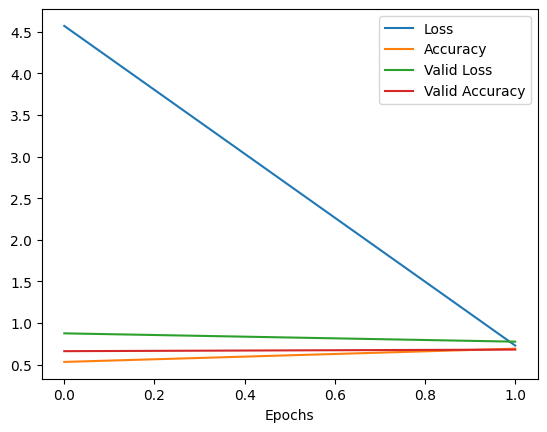

In [16]:
results = model.evaluate(test_ds, test_on, batch_size=batch_size)
print(f"Results are: loss = {results[0]}, accuracy = {results[1]}")
# print(history)
history_data = history.history

print(history_data.keys())

# model_fitting = go.Figure()
# model_fitting.add_trace(go.Scatter(y = history_data["loss"]))
# model_fitting.show()
plt.plot(history_data["loss"])
plt.plot(history_data["categorical_accuracy"])
plt.plot(history_data["val_loss"])
plt.plot(history_data["val_categorical_accuracy"])
plt.xlabel("Epochs")
plt.legend(["Loss", "Accuracy", "Valid Loss", "Valid Accuracy"])
plt.show()